In [2]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
file_path=Path('IMBD.csv')
IMBD_df=pd.read_csv(file_path,encoding='UTF8')

IMBD_df=IMBD_df.drop_duplicates(subset='title')
IMBD_df.dropna(inplace=True)

IMBD_df['primary_genre'] = IMBD_df['genre'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else None)

IMBD_df

bins = [0,20000,40000,60000,80000,100000]

group_names = ["0-20000","20000-40000", "40000-60000","60000-80000" ,"80000-100000"]
merged_df_new = IMBD_df.copy()
# Create a copy of the school summary since it has the "Per Student Budget"
merged_df_new["votes"] = merged_df_new["votes"].str.replace(",","")
merged_df_new['votes'] = pd.to_numeric(merged_df_new['votes'], errors='coerce')

# Use `pd.cut` to categorize spending based on the bins.

merged_df_new["vote_grouped"] = pd.cut(merged_df_new["votes"],bins,labels=group_names)


merged_df_cleaned = merged_df_new[['title','year','duration','primary_genre','rating','vote_Range']]
merged_df_cleaned = merged_df_cleaned.dropna(subset=['vote_Range'])


merged_df_cleaned.to_csv('IMBD_Cleaned.csv', index=False)

In [26]:
file_path_2=Path('MoviesOnStreamingPlatforms_updated.csv')
mosp_df=pd.read_csv(file_path_2,encoding="UTF8")
mosp_df=mosp_df.rename(columns={"Title":'title'})
mosp_df=mosp_df.drop_duplicates(subset='title')
mosp_df.dropna(inplace=True)
mosp_df

,ID,title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,1.0,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1.0,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1.0,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,1.0,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1.0,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16657,16658,A Kid in King Arthur's Court,1995,7+,4.7,5%,0.0,0,0,1,0,Michael Gottlieb,"Adventure,Comedy,Family,Fantasy,Romance","United States,Hungary,United Kingdom",English,89.0
16671,16672,George of the Jungle 2,2003,7+,3.3,17%,0.0,0,0,1,0,David Grossman,"Adventure,Comedy,Family","United States,Australia",English,87.0
16677,16678,That Darn Cat,1997,7+,4.7,13%,0.0,0,0,1,0,Robert Stevenson,"Comedy,Crime,Family,Thriller",United States,"English,French",116.0
16687,16688,Kazaam,1996,7+,3.0,6%,0.0,0,0,1,0,Paul Michael Glaser,"Comedy,Family,Fantasy,Musical",United States,English,93.0


In [47]:
file_path_2=Path('MoviesOnStreamingPlatforms_updated.csv')
mosp_df=pd.read_csv(file_path_2,encoding="UTF8")
mosp_df=mosp_df.rename(columns={"Title":'title'})
mosp_df=mosp_df.drop_duplicates(subset='title')
mosp_df.dropna(inplace=True)
bins = [0,30,60,90,120,180,240]
group_names = ['0-30','30-60','60-90','90-120','120-180','180-240']
df_runtime = mosp_df.copy()
# Create a copy of the school summary since it has the "Per Student Budget"
# merged_df['Runtime'] = merged_df["Runtime"].str.replace(",","")
df_runtime['Runtime'] = pd.to_numeric(df_runtime['Runtime'], errors='coerce')

# Use `pd.cut` to categorize spending based on the bins.
df_runtime["Runtime_Range"] = pd.cut(df_runtime['Runtime'],bins,labels=group_names)

df_runtime['primary_genre'] = df_runtime['Genres'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else None)
df_runtime["Runtime_Range"] = pd.cut(df_runtime['Runtime'],bins,labels=group_names)
merged_df_clean = df_runtime[['ID','title','Year','Age','IMDb','primary_genre','Netflix','Hulu','Prime Video','Disney+','Type','Runtime_Range']] 

merged_df_clean = merged_df_clean.dropna(subset=['Runtime_Range'])
merged_df_clean = merged_df_clean[merged_df_clean['title'].isin(merged_df_cleaned['title'])]
merged_df_clean['ID'] = range(1, len(merged_df_clean) + 1)
merged_df_clean.to_csv('Movies_Cleaned.csv', index=False)


In [4]:
merged_df=pd.merge(IMBD_df,mosp_df,on='title')

merged_df=merged_df.drop_duplicates(subset='title')
merged_df

,title,year,certificate,duration,genre,rating,description,stars,votes,ID,...,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,Friends,(1994–2004),TV-14,22 min,"Comedy, Romance",8.9,Follows the personal and professional lives of...,"['Jennifer Aniston, ', 'Courteney Cox, ', 'Lis...","979,424",6519,...,0.0,0,1,0,0,NaN,"Comedy,Romance",United States,"English,Dutch,Italian,French",22.0
1,Echoes,(2022),TV-MA,326 min,"Drama, Mystery, Thriller",5.9,Leni and Gina are identical twins who have sec...,"['Michelle Monaghan, ', 'Matt Bomer, ', 'Karen...","9,380",11549,...,0.0,0,1,0,0,NaN,"Drama,Romance",United Kingdom,English,60.0
2,Look Both Ways,(2022),TV-14,110 min,"Comedy, Drama, Romance",6.3,"On the eve of her college graduation, Natalie'...","['Wanuri Kahiu', '| ', ' Stars:', 'Lili Rei...","14,313",5462,...,0.0,0,1,0,0,Sarah Watt,"Drama,Mystery,Romance",Australia,English,100.0
3,The Lincoln Lawyer,(2022– ),TV-MA,60 min,"Crime, Drama, Mystery",7.7,An iconoclastic idealist runs his law practice...,"['Manuel Garcia-Rulfo, ', 'Neve Campbell, ', '...","35,356",4478,...,0.0,0,1,0,0,Brad Furman,"Crime,Drama,Thriller",United States,English,118.0
4,Homeland,(2011–2020),TV-MA,55 min,"Crime, Drama, Mystery",8.3,A bipolar CIA operative becomes convinced a pr...,"['Claire Danes, ', 'Mandy Patinkin, ', 'Damian...","339,482",3484,...,1.0,0,0,0,0,NaN,"Crime,Drama,Mystery,Thriller",United States,English,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,Shelter,(2003),NaN,80 min,Drama,6.3,Three inner-city teens find themselves strande...,"['Benno Schoberth', '| ', ' Stars:', 'Ray S...",47,8524,...,0.0,0,1,0,0,Jonah Markowitz,"Drama,Romance,Sport",United States,English,97.0
1481,Metro,(2008),NaN,120 min,Drama,NaN,The dark heart of the city is the setting for ...,"['Christopher Dorrah', '| ', ' Stars:', 'Ch...",NaN,2455,...,1.0,0,0,0,0,Luc Besson,Thriller,France,French,104.0
1482,Horton Hears a Who!,NaN,NaN,NaN,Animation,NaN,Follows the sweet-natured young pachyderm. He ...,[],NaN,3643,...,0.0,1,0,0,0,"Jimmy Hayward,Steve Martino","Animation,Adventure,Comedy,Family,Fantasy",United States,English,86.0
1483,Grillo vs Grillo,(2017),NaN,96 min,Comedy,5.3,The Italian comedian-turned-politician Beppe G...,"['Enzo Pirrone', '| ', ' Star:', 'Beppe Gri...",131,3274,...,1.0,0,0,0,0,Enzo Pirrone,Comedy,Italy,Italian,NaN


In [5]:
no_na_df=merged_df.dropna()

In [6]:
director_group=no_na_df.loc[no_na_df['Netflix']==1].groupby(no_na_df['Directors']).value_counts()
director_group

Directors                     title                                             year    certificate  duration  genre                        rating  description                                                                                                                                                                                                                         stars                                                                                                                              votes   ID    Year  Age  IMDb  Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+  Type  Directors                     Genres                               Country                        Language                  Runtime
Aaron Lieber                  Bethany Hamilton: Unstoppable                     (2018)  PG           100 min   Documentary, Sport           7.4     After losing an arm to a shark attack at age 13, Bethany Hamilton refuses to give up her dreams of being a professional su

In [7]:
genre_grouped_df=pd.DataFrame(merged_df.groupby('Genres')['rating'].mean())

genre_grouped_df["Genre"]=genre_grouped_df.index
genre_grouped_df


,rating,Genre
Genres,,
Action,4.440000,Action
"Action,Adventure,Comedy",5.233333,"Action,Adventure,Comedy"
"Action,Adventure,Comedy,Crime",7.000000,"Action,Adventure,Comedy,Crime"
"Action,Adventure,Comedy,Crime,Thriller",5.600000,"Action,Adventure,Comedy,Crime,Thriller"
"Action,Adventure,Comedy,Horror,Sci-Fi,Thriller",3.650000,"Action,Adventure,Comedy,Horror,Sci-Fi,Thriller"
...,...,...
"Short,Drama",6.100000,"Short,Drama"
"Short,Family,Fantasy,Musical",5.800000,"Short,Family,Fantasy,Musical"
"Short,Horror,Sci-Fi,Thriller",7.600000,"Short,Horror,Sci-Fi,Thriller"


In [8]:
action_movies=merged_df.loc[merged_df['genre']=='Action']
action_movies

,title,year,certificate,duration,genre,rating,description,stars,votes,ID,...,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
588,Gridlocked,(2015),R,110 min,Action,5.8,Former SWAT leader David Hendrix and hard-part...,"['Allan Ungar', '| ', ' Stars:', 'Dominic P...","4,650",2112,...,1.0,0,0,0,0,Allan Ungar,Action,Canada,English,110.0
781,Tactical Force,(2011),R,91 min,Action,4.7,A training exercise for the LAPD SWAT Team goe...,"['Adamo P. Cultraro', '| ', ' Stars:', 'Ste...","5,916",9178,...,0.0,0,1,0,0,Adamo P. Cultraro,"Action,Comedy,Crime,Thriller",Canada,English,91.0
922,Street,(I) (2015),PG-13,85 min,Action,4.6,Remo Street is a young fighter who has to choo...,"['Bradford May', '| ', ' Stars:', 'Quincy B...","1,156",8137,...,0.0,0,1,0,0,York Alec Shackleton,Drama,United States,English,90.0
952,Atone,(2019),NaN,89 min,Action,3.1,"Former special ops soldier, Laura Bishop, show...","['Wes Miller', '| ', ' Stars:', 'Robert Rus...",474,9724,...,0.0,0,1,0,0,Wes Miller,Action,United States,NaN,89.0
1034,The King of the Streets,(2012),TV-MA,88 min,Action,5.0,"Killing a competitor in a brutal street fight,...","['Zhong Lei, ', 'Yue Song', '| ', ' Stars:'...",461,12678,...,0.0,0,1,0,0,"Zhong Lei,Yue Song",Action,China,Mandarin,88.0
1299,Rumble,(2017),NaN,NaN,Action,3.6,Rumble revolves around an aging and injured fo...,"['R. Ellis Frazier', '| ', ' Stars:', 'Gary...",301,3325,...,1.0,0,0,0,0,Hamish Grieve,"Animation,Comedy,Family,Fantasy,Sport",United States,English,NaN


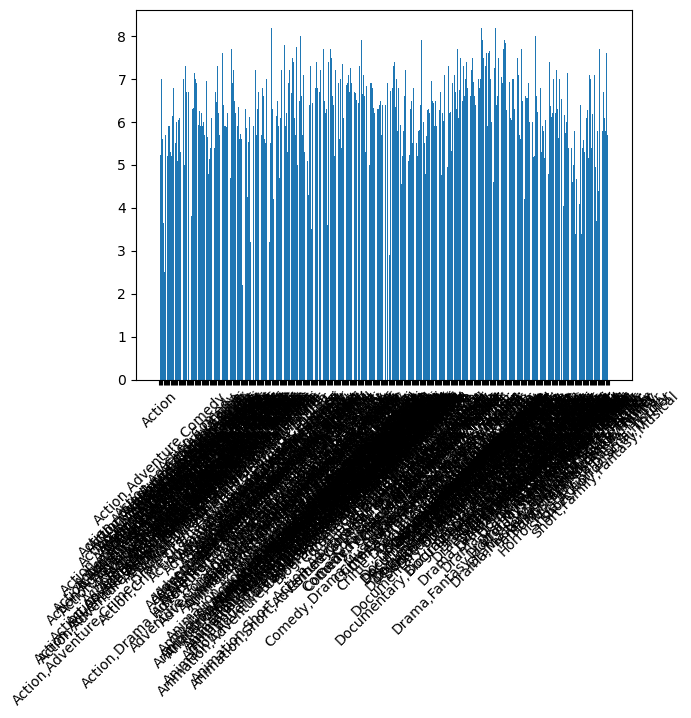

In [9]:

plt.bar(genre_grouped_df['Genre'],genre_grouped_df['rating'])
plt.xticks(rotation=45)
plt.show()

In [10]:
merged_df.dtypes

title               object
year                object
certificate         object
duration            object
genre               object
rating             float64
description         object
stars               object
votes               object
ID                   int64
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Netflix            float64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
Directors           object
Genres              object
Country             object
Language            object
Runtime            float64
dtype: object

In [11]:

bins = [0,20000,40000,60000,80000,100000]

group_names = ["0-20000","20000-40000", "40000-60000","60000-80000" ,"80000-100000"]
merged_df_new = merged_df.copy()
# Create a copy of the school summary since it has the "Per Student Budget"
merged_df_new["votes"] = merged_df_new["votes"].str.replace(",","")
merged_df_new['votes'] = pd.to_numeric(merged_df_new['votes'], errors='coerce')
merged_df_new
# Use `pd.cut` to categorize spending based on the bins.

merged_df_new["vote_grouped"] = pd.cut(merged_df_new["votes"],bins,labels=group_names)

merged_df_cleaned = merged_df_new.dropna(subset=['vote_grouped'])

# Optionally reset index if needed
merged_df_cleaned.reset_index(drop=True, inplace=True)
merged_df_cleaned


,title,year,certificate,duration,genre,rating,description,stars,votes,ID,...,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,vote_grouped
0,Echoes,(2022),TV-MA,326 min,"Drama, Mystery, Thriller",5.9,Leni and Gina are identical twins who have sec...,"['Michelle Monaghan, ', 'Matt Bomer, ', 'Karen...",9380.0,11549,...,0,1,0,0,NaN,"Drama,Romance",United Kingdom,English,60.0,0-20000
1,Look Both Ways,(2022),TV-14,110 min,"Comedy, Drama, Romance",6.3,"On the eve of her college graduation, Natalie'...","['Wanuri Kahiu', '| ', ' Stars:', 'Lili Rei...",14313.0,5462,...,0,1,0,0,Sarah Watt,"Drama,Mystery,Romance",Australia,English,100.0,0-20000
2,The Lincoln Lawyer,(2022– ),TV-MA,60 min,"Crime, Drama, Mystery",7.7,An iconoclastic idealist runs his law practice...,"['Manuel Garcia-Rulfo, ', 'Neve Campbell, ', '...",35356.0,4478,...,0,1,0,0,Brad Furman,"Crime,Drama,Thriller",United States,English,118.0,20000-40000
3,The Poison Rose,(2019),R,98 min,"Crime, Mystery, Thriller",4.7,"Inspired by classic film noir, Carson Phillips...","['Francesco Cinquemani, ', 'George Gallo', '| ...",9475.0,7894,...,0,1,0,0,"Francesco Cinquemani,George Gallo",Thriller,"Italy,United States","English,Spanish",98.0,0-20000
4,Scorpion,(2014–2018),TV-14,43 min,"Action, Crime, Drama",7.0,An eccentric genius forms an international net...,"['Elyes Gabel, ', 'Katharine McPhee, ', 'Eddie...",53803.0,9469,...,0,1,0,0,NaN,"Action,Crime,Drama,Thriller",United States,English,43.0,40000-60000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368,Arango y Sanint: Ríase el show,(2018 TV Special),NaN,62 min,Comedy,4.0,Add a Plot,"['Raúl Campos, ', 'Jan Suter', '| ', ' Star...",42.0,3421,...,0,0,0,0,"Raúl Campos,Jan Suter",Comedy,Colombia,Spanish,NaN,0-20000
1369,The Panama Papers,(2016),PG,43 min,"Documentary, Short",6.6,A German newspaper journalist Bastian Obermaye...,['Sarah Ferguson'],16.0,4774,...,0,1,0,0,Alex Winter,Documentary,United States,"English,Spanish,Icelandic,Maltese,Russian",96.0,0-20000
1370,Shelter,(2003),NaN,80 min,Drama,6.3,Three inner-city teens find themselves strande...,"['Benno Schoberth', '| ', ' Stars:', 'Ray S...",47.0,8524,...,0,1,0,0,Jonah Markowitz,"Drama,Romance,Sport",United States,English,97.0,0-20000
1371,Grillo vs Grillo,(2017),NaN,96 min,Comedy,5.3,The Italian comedian-turned-politician Beppe G...,"['Enzo Pirrone', '| ', ' Star:', 'Beppe Gri...",131.0,3274,...,0,0,0,0,Enzo Pirrone,Comedy,Italy,Italian,NaN,0-20000


C:\Users\vidya\AppData\Local\Temp\ipykernel_19260\927464368.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vote_df=pd.DataFrame(merged_df_cleaned.groupby('vote_grouped')['rating'].mean())


([0, 1, 2, 3, 4],
 [Text(0, 0, '0-20000'),
  Text(1, 0, '20000-40000'),
  Text(2, 0, '40000-60000'),
  Text(3, 0, '60000-80000'),
  Text(4, 0, '80000-100000')])

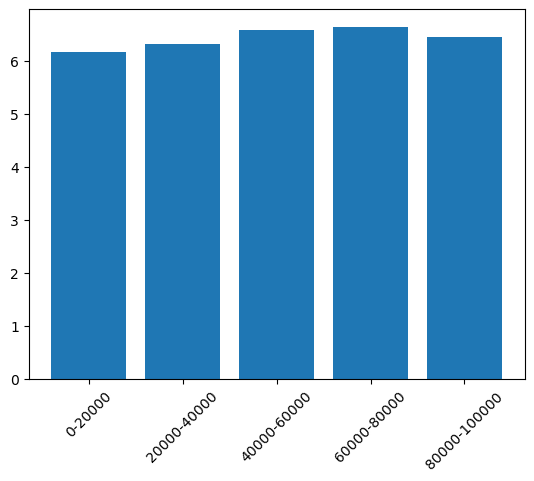

In [12]:
vote_df=pd.DataFrame(merged_df_cleaned.groupby('vote_grouped')['rating'].mean())

vote_df = vote_df.reset_index()


# Rename the column if necessary
vote_df.columns = ['vote_grouped', 'Average Rating']

plt.bar(vote_df['vote_grouped'],vote_df['Average Rating'])
plt.xticks(rotation=45)
#plt.show()

In [16]:
vote_df = merged_df_cleaned[['title','votes','vote_grouped']]
vote_df

,title,votes,vote_grouped
0,Echoes,9380.0,0-20000
1,Look Both Ways,14313.0,0-20000
2,The Lincoln Lawyer,35356.0,20000-40000
3,The Poison Rose,9475.0,0-20000
4,Scorpion,53803.0,40000-60000
...,...,...,...
1368,Arango y Sanint: Ríase el show,42.0,0-20000
1369,The Panama Papers,16.0,0-20000
1370,Shelter,47.0,0-20000
1371,Grillo vs Grillo,131.0,0-20000


In [17]:
vote_df.to_csv('vote.csv', index=False)

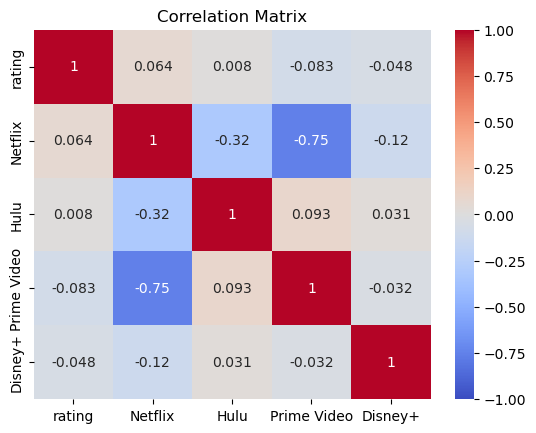

In [22]:

OTT_df = merged_df_cleaned[['rating','Netflix','Hulu','Prime Video','Disney+']]
OTT_df
# Calculate correlation matrix
correlation_matrix = OTT_df.corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()